In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.compose import ColumnTransformer 
import copy
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
#from sqlalchemy import create_engine
from sklearn.metrics import confusion_matrix, classification_report
import string
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from sklearn.decomposition import PCA,TruncatedSVD, IncrementalPCA
from scipy.sparse import random as sparse_random
from sklearn.random_projection import sparse_random_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error as MSE 

In [2]:
df = pd.read_csv("mod_train.csv")

In [3]:
df

,Unnamed: 0,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date,year,month,delay
0,0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01,2018,1,0
1,1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01,2018,1,0
2,2,3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01,2018,1,0
3,3,4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01,2018,1,0
4,4,5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01,2018,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,6695,6696,Burlington,0.0,542.940,3,East,kariox,Consumer,battery,Standard Class,9389,152.0232,2021-01-01,5408,Vermont,2021-01-01,2021,1,0
6696,6696,6697,San Jose,0.2,276.784,2,West,kariox,Corporate,headset,Standard Class,9597,89.9548,2021-01-01,95123,California,2021-01-01,2021,1,0
6697,6697,6698,Burlington,0.0,2.040,1,East,kariox,Consumer,watch,Standard Class,9390,0.9588,2021-01-01,5408,Vermont,2021-01-01,2021,1,0
6698,6698,6699,New York City,0.1,207.846,3,East,qexty,Corporate,tshirts,Second Class,440,2.3094,2021-01-01,10024,New York,2021-01-01,2021,1,0


In [4]:
df_diff = df.loc[df['delivery date'] != df['placement date']] 
df_diff

,Unnamed: 0,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date,year,month,delay
21,21,22,Mission Viejo,0.15,290.666,2,West,qexty,Consumer,pants,First Class,3366,3.4196,2018-02-01,92691,California,2018-01-01,2018,2,1
22,22,23,Detroit,0.00,229.940,2,Central,kariox,Consumer,laptop,Standard Class,6389,6.8982,2018-02-01,48234,Michigan,2018-01-01,2018,2,1
23,23,24,Detroit,0.00,10.560,2,Central,kariox,Consumer,phone,Standard Class,6388,4.7520,2018-02-01,48234,Michigan,2018-01-01,2018,2,1
24,24,25,New York City,0.20,3.928,1,East,kariox,Consumer,headset,Standard Class,3084,1.3257,2018-02-01,10024,New York,2018-01-01,2018,2,1
25,25,26,San Diego,0.00,36.440,4,West,kariox,Consumer,television,Standard Class,3797,12.0252,2018-02-01,92037,California,2018-01-01,2018,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6483,6483,6484,Phoenix,0.20,100.800,2,West,fynota,Corporate,chocolates,Standard Class,6803,21.4200,2021-01-01,85023,Arizona,2020-12-01,2021,1,1
6484,6484,6485,Phoenix,0.20,45.120,3,West,fynota,Corporate,chocolates,Standard Class,6802,-7.8960,2021-01-01,85023,Arizona,2020-12-01,2021,1,1
6485,6485,6486,Phoenix,0.70,269.970,2,West,fynota,Corporate,sweets,Standard Class,6801,-386.9570,2021-01-01,85023,Arizona,2020-12-01,2021,1,1
6486,6486,6487,Phoenix,0.50,35.445,1,West,qexty,Corporate,hoodies,Standard Class,6800,-24.1026,2021-01-01,85023,Arizona,2020-12-01,2021,1,1


In [12]:
df['class'].value_counts()

kariox    4034
qexty     1437
fynota    1229
Name: class, dtype: int64

In [13]:
df['segment'].value_counts()  # -> segment, class- wise avg profit

Consumer       3523
Corporate      2048
Home Office    1129
Name: segment, dtype: int64

In [14]:
df['sub-class'].value_counts()

headset       1025
phone          913
shorts         641
colddrinks     597
laptop         559
television     513
chocolates     502
tshirts        428
battery        303
tablet         250
hoodies        216
watch          185
lighting       155
pants          152
charger        131
sweets          83
fastfood        47
Name: sub-class, dtype: int64

In [15]:

# create columns for month, year, delay
# area specific discount rate
# divide states into categories
# base price of each item
# discount adjusted 
# discount vs profit
# boruta feature selection 

In [16]:
df['departure state'].value_counts()  

California              1339
New York                 777
Texas                    668
Pennsylvania             390
Illinois                 323
Ohio                     307
Washington               296
Florida                  255
Michigan                 192
Virginia                 181
North Carolina           164
Arizona                  156
Georgia                  123
Colorado                 121
Tennessee                102
Massachusetts             96
Oregon                    94
Indiana                   88
Kentucky                  88
New Jersey                87
Wisconsin                 77
Delaware                  77
Maryland                  68
Minnesota                 51
Oklahoma                  49
Connecticut               48
Alabama                   45
Arkansas                  41
Mississippi               40
Missouri                  40
Utah                      38
Rhode Island              35
South Carolina            34
Nevada                    31
Louisiana     

In [17]:
df['departure city'].value_counts()

New York City    610
Los Angeles      538
Philadelphia     355
San Francisco    319
Houston          273
                ... 
New Bedford        1
Normal             1
Moorhead           1
Garland            1
Layton             1
Name: departure city, Length: 469, dtype: int64

In [18]:
df['address code'].value_counts()

10035    174
10024    158
10009    148
94122    133
10011    130
        ... 
95695      1
68701      1
76706      1
42104      1
71854      1
Name: address code, Length: 562, dtype: int64

In [19]:
df['delivery date'].value_counts()

2020-12-01    360
2020-09-01    359
2020-11-01    352
2019-12-01    334
2018-11-01    313
2019-11-01    307
2019-09-01    289
2018-12-01    254
2018-09-01    248
2020-06-01    236
2020-10-01    207
2020-07-01    202
2020-04-01    180
2020-05-01    174
2018-10-01    169
2019-10-01    167
2019-06-01    156
2020-08-01    155
2018-07-01    151
2019-07-01    149
2020-03-01    149
2018-08-01    149
2019-04-01    146
2019-08-01    143
2018-03-01    141
2019-05-01    141
2018-04-01    135
2018-06-01    132
2019-03-01    131
2018-05-01    126
2019-01-01    104
2020-01-01     99
2020-02-01     92
2018-01-01     72
2021-01-01     64
2019-02-01     64
2018-02-01     50
Name: delivery date, dtype: int64

In [20]:
df['placement date'].value_counts()

2020-11-01    373
2020-09-01    362
2020-12-01    350
2019-11-01    324
2018-11-01    318
2019-12-01    316
2019-09-01    293
2018-12-01    278
2018-09-01    268
2020-05-01    222
2020-06-01    202
2020-07-01    199
2020-10-01    190
2020-08-01    180
2020-04-01    170
2019-10-01    166
2020-03-01    161
2019-04-01    160
2018-10-01    159
2019-08-01    159
2018-03-01    157
2018-08-01    153
2019-05-01    146
2018-07-01    143
2019-07-01    140
2019-06-01    138
2019-03-01    138
2018-06-01    135
2018-04-01    135
2018-05-01    122
2020-01-01     89
2020-02-01     82
2018-01-01     79
2019-02-01     64
2019-01-01     58
2018-02-01     46
2021-01-01     25
Name: placement date, dtype: int64

In [26]:
d_show = df.loc[df['sub-class']=="hoodies"]
d_show

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
26,27,San Diego,0.2,333.000,3,West,qexty,Consumer,hoodies,Standard Class,3796,-16.6500,2018-02-01,92037,California,2018-01-01
119,120,Chesapeake,0.0,1256.220,6,South,qexty,Consumer,hoodies,Standard Class,5632,75.3732,2018-02-01,23320,Virginia,2018-02-01
184,185,Springfield,0.4,330.588,1,East,qexty,Home Office,hoodies,Standard Class,9900,-143.2548,2018-04-01,45503,Ohio,2018-03-01
192,193,Plano,0.3,890.841,3,Central,qexty,Consumer,hoodies,Standard Class,7306,-152.7156,2018-04-01,75023,Texas,2018-03-01
199,200,Des Moines,0.0,1184.720,4,Central,qexty,Consumer,hoodies,Standard Class,7841,106.6248,2018-04-01,50315,Iowa,2018-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6605,6606,Springfield,0.0,1056.860,7,South,qexty,Consumer,hoodies,First Class,8555,158.5290,2020-12-01,22153,Virginia,2020-12-01
6621,6622,Columbus,0.4,328.590,3,East,qexty,Corporate,hoodies,Same Day,5998,-147.8655,2020-12-01,43229,Ohio,2020-12-01
6659,6660,Franklin,0.4,79.974,3,South,qexty,Corporate,hoodies,Second Class,3258,-29.3238,2020-12-01,37064,Tennessee,2020-12-01
6674,6675,San Francisco,0.2,1421.664,6,West,qexty,Corporate,hoodies,Standard Class,3481,-195.4788,2020-12-01,94110,California,2020-12-01


In [11]:
#df_arr = df.to_numpy()
#print(df_arr)

df_cp = df.copy()


df_darr = df_cp.drop(['id','Unnamed: 0','departure city','location','class','RID','departure state','delivery date','placement date','address code'],axis=1)
print(df_darr)

      discount    price  no of items    segment   sub-class   delivery type  \
0          0.2   16.448            2   Consumer       phone  Standard Class   
1          0.0   29.700            5   Consumer     headset  Standard Class   
2          0.0   14.730            3   Consumer      shorts  Standard Class   
3          0.0   43.920            3   Consumer  television  Standard Class   
4          0.0   66.580            2   Consumer      laptop  Standard Class   
...        ...      ...          ...        ...         ...             ...   
6695       0.0  542.940            3   Consumer     battery  Standard Class   
6696       0.2  276.784            2  Corporate     headset  Standard Class   
6697       0.0    2.040            1   Consumer       watch  Standard Class   
6698       0.1  207.846            3  Corporate     tshirts    Second Class   
6699       0.2  160.776            3   Consumer  colddrinks  Standard Class   

        profit  year  month  delay  
0       5.5512

In [12]:
df_arr = df_darr.to_numpy()
df_arr            # discount, price, no. items, segment, sub-class, del.type, profit, year, month, delay

array([[0.2, 16.448, 2, ..., 2018, 1, 0],
       [0.0, 29.7, 5, ..., 2018, 1, 0],
       [0.0, 14.73, 3, ..., 2018, 1, 0],
       ...,
       [0.0, 2.04, 1, ..., 2021, 1, 0],
       [0.1, 207.846, 3, ..., 2021, 1, 0],
       [0.2, 160.776, 3, ..., 2021, 1, 0]], dtype=object)

In [14]:
#experimenting

# One hot encoding
enc = onehot(handle_unknown='ignore')
X = [['Male', 1], ['Female', 3], ['Female', 2]]
#enc.fit(df_arr[:,5:7],)
enc.fit(X)
print(enc.categories_)
#val = enc.transform([['Standard Class', 1], ['Second Class', 4]]).toarray()
#print(val)

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]


In [20]:
seg = np.reshape(np.array(df_arr[:,3],dtype=np.str),(-1,1))
subcl = np.reshape(np.array(df_arr[:,4],dtype=np.str),(-1,1))
delt = np.reshape(np.array(df_arr[:,5],dtype=np.str),(-1,1))
year = np.reshape(np.array(df_arr[:,7],dtype=np.str),(-1,1))
month = np.reshape(np.array(df_arr[:,8],dtype=np.str),(-1,1))


In [21]:
enc.fit(seg)
print(enc.categories_)
segv = enc.transform(seg).toarray()
print(segv)

enc.fit(subcl)
print(enc.categories_)
subclv = enc.transform(subcl).toarray()
print(subclv)

enc.fit(year)
print(enc.categories_)
yearv = enc.transform(year).toarray()
print(yearv)

enc.fit(delt)
print(enc.categories_)
deltv = enc.transform(delt).toarray()
print(deltv)

enc.fit(month)
print(enc.categories_)
monthv = enc.transform(delay).toarray()
print(monthv)


[array(['Consumer', 'Corporate', 'Home Office'], dtype='<U11')]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
[array(['battery', 'charger', 'chocolates', 'colddrinks', 'fastfood',
       'headset', 'hoodies', 'laptop', 'lighting', 'pants', 'phone',
       'shorts', 'sweets', 'tablet', 'television', 'tshirts', 'watch'],
      dtype='<U10')]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[array(['2018', '2019', '2020', '2021'], dtype='<U4')]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
[array(['First Class', 'Same Day', 'Second Class', 'Standard Class', 'nan'],
      dtype='<U14')]
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]
[array(['1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9'],
      dtype='<U2')]
[[1. 0. 0. ... 

In [23]:
up_arr = np.concatenate((df_arr[:,:3],segv[:]),axis=1)
up_arr = np.concatenate((up_arr,subclv[:]),axis=1)
up_arr = np.concatenate((up_arr,deltv[:]),axis=1)
up_arr = np.concatenate((up_arr,yearv[:]),axis=1)
up_arr = np.concatenate((up_arr,monthv[:]),axis=1)
up_arr = np.concatenate((up_arr,df_arr[:,9:]),axis=1)
print(up_arr)
pr_arr = df_arr[:,6]
print(pr_arr)

[[0.2 16.448 2 ... 0.0 0.0 0]
 [0.0 29.7 5 ... 0.0 0.0 0]
 [0.0 14.73 3 ... 0.0 0.0 0]
 ...
 [0.0 2.04 1 ... 0.0 0.0 0]
 [0.1 207.846 3 ... 0.0 0.0 0]
 [0.2 160.776 3 ... 0.0 0.0 0]]
[5.5512 13.365 4.8609 ... 0.9588 2.3094 10.0485]


In [32]:
train_X, test_X, train_y, test_y = train_test_split(up_arr, pr_arr, 
                      test_size = 0.3, random_state = 123) 
  
# Instantiation 
xgb_r = xgb.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 100, learning_rate = 0.01, max_depth = 10, seed = 123) 

In [33]:
xgb_r.fit(train_X, train_y) 
  
# Predict the model 
pred = xgb_r.predict(test_X) 
  
# RMSE Computation 
#zr = np.zeros()
rmse = 1 - np.sum((pred-test_y)*(pred-test_y))/(np.sum(test_y*test_y)) 
print("RMSE : % f" %(rmse)) 

[03:35:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  0.684426


In [36]:
train_X

array([[0.0, 26.7, 2, ..., 0.0, 0.0, 0],
       [0.7, 12.843, 3, ..., 0.0, 0.0, 0],
       [0.0, 87.71, 7, ..., 0.0, 0.0, 0],
       ...,
       [0.2, 4.928, 2, ..., 0.0, 0.0, 0],
       [0.2, 8.016, 3, ..., 0.0, 0.0, 0],
       [0.0, 79.76, 4, ..., 0.0, 0.0, 0]], dtype=object)

In [ ]:
############# Submission start ##############

In [108]:
df1 = pd.read_csv("test.xls")
df1

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,delivery date,address code,departure state,placement date
0,6701,San Francisco,0.0,24.200,5,West,kariox,Consumer,television,Standard Class,2408,2021-01-01,94122,California,2021-01-01
1,6702,San Francisco,0.2,359.976,3,West,fynota,Consumer,colddrinks,Standard Class,2409,2021-01-01,94122,California,2021-01-01
2,6703,Waterbury,0.0,3.520,2,East,kariox,Consumer,television,Standard Class,5425,2021-01-01,6708,Connecticut,2021-01-01
3,6704,Chicago,0.2,11.520,5,Central,kariox,Consumer,tablet,First Class,7408,2021-01-01,60653,Illinois,2021-01-01
4,6705,Seattle,0.0,242.940,3,West,kariox,Home Office,laptop,Standard Class,733,2021-01-01,98115,Washington,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,9990,New York City,0.0,31.920,4,East,kariox,Consumer,laptop,Second Class,1171,2021-12-01,10035,New York,2021-12-01
3290,9991,New York City,0.0,19.440,3,East,kariox,Consumer,phone,Second Class,1170,2021-12-01,10035,New York,2021-12-01
3291,9992,New York City,0.0,272.940,3,East,kariox,Consumer,laptop,Second Class,1169,2021-12-01,10035,New York,2021-12-01
3292,9993,San Francisco,0.2,113.568,2,West,qexty,Consumer,tshirts,Standard Class,414,2021-12-01,94110,California,2021-12-01


In [109]:
df_test = df1.drop(['id','departure city','location','class','RID','departure state','delivery date','placement date','segment','delivery type','address code'],axis=1)


In [110]:
df_test

,discount,price,no of items,sub-class
0,0.0,24.200,5,television
1,0.2,359.976,3,colddrinks
2,0.0,3.520,2,television
3,0.2,11.520,5,tablet
4,0.0,242.940,3,laptop
...,...,...,...,...
3289,0.0,31.920,4,laptop
3290,0.0,19.440,3,phone
3291,0.0,272.940,3,laptop
3292,0.2,113.568,2,tshirts


In [112]:
test_arr = df_test.to_numpy()
test_arr

array([[0.0, 24.2, 5, 'television'],
       [0.2, 359.976, 3, 'colddrinks'],
       [0.0, 3.52, 2, 'television'],
       ...,
       [0.0, 272.94, 3, 'laptop'],
       [0.2, 113.568, 2, 'tshirts'],
       [0.2, 3.0239999999999996, 3, 'lighting']], dtype=object)

In [113]:
subt = np.reshape(test_arr[:,3],(-1,1))

subtr = enc.transform(subt).toarray()
subtr

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [117]:
up_test = np.concatenate((test_arr[:,:3],subtr),axis=1)
up_test

array([[0.0, 24.2, 5, ..., 1.0, 0.0, 0.0],
       [0.2, 359.976, 3, ..., 0.0, 0.0, 0.0],
       [0.0, 3.52, 2, ..., 1.0, 0.0, 0.0],
       ...,
       [0.0, 272.94, 3, ..., 0.0, 0.0, 0.0],
       [0.2, 113.568, 2, ..., 0.0, 1.0, 0.0],
       [0.2, 3.0239999999999996, 3, ..., 0.0, 0.0, 0.0]], dtype=object)

In [118]:
pred_test = xgb_r.predict(up_test)
pred_test

array([ 5.367894 , 23.109272 ,  1.7790574, ..., 26.623896 ,  9.536796 ,
        1.6284914], dtype=float32)

In [119]:
len(pred_test)

3294

In [120]:
sub = pd.DataFrame()

In [121]:
sub['profit'] = pred_test

In [123]:
sub.to_csv('/home/profit_file.csv')

In [ ]:
########### Submission end #############

In [ ]:
########## LSTM ############

In [38]:
'''
STEP 1: LOADING DATASET
'''
train_dataset = train_X

test_dataset = test_X


In [39]:
'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 1
n_iters = 30
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [41]:
'''
STEP 3: CREATE MODEL CLASS
'''

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim
        
        # Number of hidden layers
        self.layer_dim = layer_dim
        
        # Building your LSTM
        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        # Initialize hidden state with zeros
        #######################
        #  USE GPU FOR MODEL  #
        #######################

        #if torch.cuda.is_available():
        #    h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
        #else:
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
        
        # Initialize cell state
        #if torch.cuda.is_available():
        #    c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
        #else:
        c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
        
        # All time step
        out, (hn, cn) = self.lstm(x, (h0,c0))
        
        # Index hidden state of last time step
        # out.size() --> 100, 28, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        
        # out.size() --> 100, 10
        return out

In [42]:
'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = train_dataset.shape[1]
hidden_dim = 10
layer_dim = 3  # ONLY CHANGE IS HERE FROM ONE LAYER TO TWO LAYER
output_dim = 1

model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################

#if torch.cuda.is_available():
#    model.cuda()

In [44]:
'''
STEP 5: INSTANTIATE LOSS CLASS
'''
#criterion = nn.CrossEntropyLoss()
criterion = nn.MSELoss()

'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
STEP 7: TRAIN THE MODEL
'''

# Number of steps to unroll
seq_dim = 28  

iter = 0
for epoch in range(num_epochs):
    for i, (data) in enumerate(train_loader):
        # Load images as Variable
        #######################
        #  USE GPU FOR MODEL  #
        #######################
#         if torch.cuda.is_available():
#             images = Variable(images.view(-1, seq_dim, input_dim).cuda())
#             labels = Variable(labels.cuda())
        #else:
        
        
        images = Variable(images.view(-1, seq_dim, input_dim))
        #labels = Variable(labels)
            
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        # outputs.size() --> 100, 10
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, seq_dim, input_dim).cuda())
                else:
                    images = Variable(images.view(-1, seq_dim, input_dim))
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data, accuracy))

In [45]:
for i, (data) in enumerate(train_loader):
    print(data)

TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found object

In [47]:
train_loader.dataset

array([[0.0, 26.7, 2, ..., 0.0, 0.0, 0],
       [0.7, 12.843, 3, ..., 0.0, 0.0, 0],
       [0.0, 87.71, 7, ..., 0.0, 0.0, 0],
       ...,
       [0.2, 4.928, 2, ..., 0.0, 0.0, 0],
       [0.2, 8.016, 3, ..., 0.0, 0.0, 0],
       [0.0, 79.76, 4, ..., 0.0, 0.0, 0]], dtype=object)

In [21]:
print(df.columns)
len(df.columns)

Index(['id', 'departure city', 'discount', 'price', 'no of items', 'location',
       'class', 'segment', 'sub-class', 'delivery type', 'RID', 'profit',
       'delivery date', 'address code', 'departure state', 'placement date'],
      dtype='object')


16

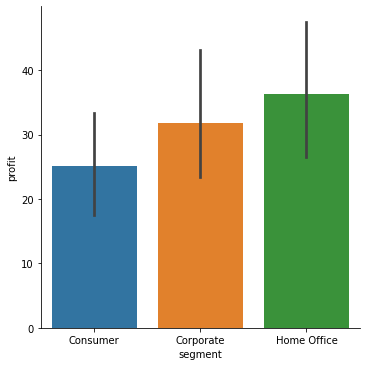

In [23]:
import seaborn as sns
sns.catplot(x="segment", y="profit", kind="bar", data=df)

In [54]:
df['no of items'].value_counts()

3     1656
2     1625
4      794
5      792
1      565
7      415
6      401
9      178
8      158
10      39
11      21
14      21
13      19
12      16
Name: no of items, dtype: int64

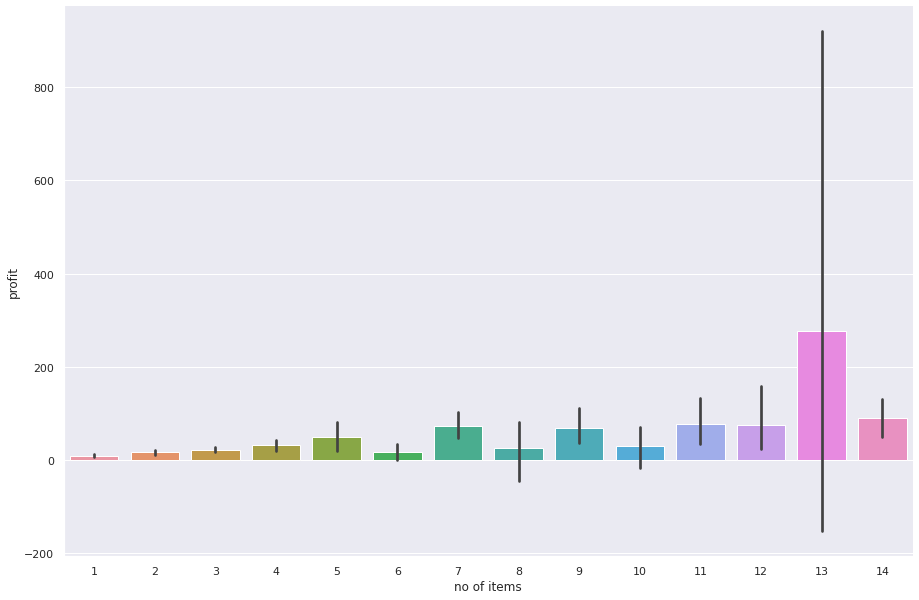

In [52]:
import seaborn as sns
sns.catplot(y="profit", x="no of items", kind="bar", data=df,height=8.27, aspect=12.7/8.27)

In [58]:
187.98 - 155.35 

32.629999999999995

In [69]:


df_cd = df.loc[df['sub-class'] == 'colddrinks']  #155.30
df_cd_Ca = df_cd.loc[df_cd['departure state'] == 'California']
df_cd_Ca[df_cd_Ca['address code'] == 90008]

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
446,447,Los Angeles,0.2,83.984,2,West,fynota,Corporate,colddrinks,Standard Class,1613,31.4940,2018-05-01,90008,California,2018-05-01
471,472,Los Angeles,0.2,201.584,2,West,fynota,Corporate,colddrinks,Standard Class,1612,20.1584,2018-05-01,90008,California,2018-05-01
1449,1450,Los Angeles,0.2,79.968,4,West,fynota,Corporate,colddrinks,First Class,8709,-17.9928,2018-11-01,90008,California,2018-11-01
1802,1803,Los Angeles,0.2,211.168,4,West,fynota,Corporate,colddrinks,First Class,8796,15.8376,2018-12-01,90008,California,2018-12-01
1852,1853,Los Angeles,0.2,583.800,5,West,fynota,Corporate,colddrinks,First Class,8795,72.9750,2018-12-01,90008,California,2018-12-01
2290,2291,Los Angeles,0.2,88.776,3,West,fynota,Consumer,colddrinks,Standard Class,6293,7.7679,2019-04-01,90008,California,2019-04-01
2506,2507,Los Angeles,0.2,88.752,3,West,fynota,Corporate,colddrinks,Standard Class,1450,11.0940,2019-05-01,90008,California,2019-05-01
3408,3409,Los Angeles,0.2,503.960,5,West,fynota,Consumer,colddrinks,First Class,6955,50.3960,2019-10-01,90008,California,2019-10-01
3692,3693,Los Angeles,0.2,1212.848,7,West,fynota,Home Office,colddrinks,Standard Class,1487,106.1242,2019-11-01,90008,California,2019-11-01
3847,3848,Los Angeles,0.2,135.984,2,West,fynota,Consumer,colddrinks,Second Class,8938,16.9980,2019-12-01,90008,California,2019-12-01


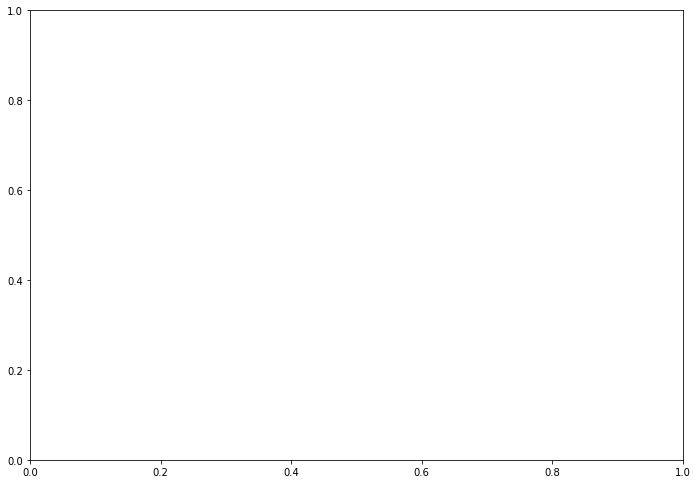

In [34]:
from matplotlib import pyplot
import seaborn

# import mylib

a4_dims = (11.7, 8.27)
# df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=a4_dims)

In [43]:
sns.set(rc={'figure.figsize':(80,60)})

/home/rohit/Desktop/Coneio/nlp/lib/python3.6/site-packages/seaborn/categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


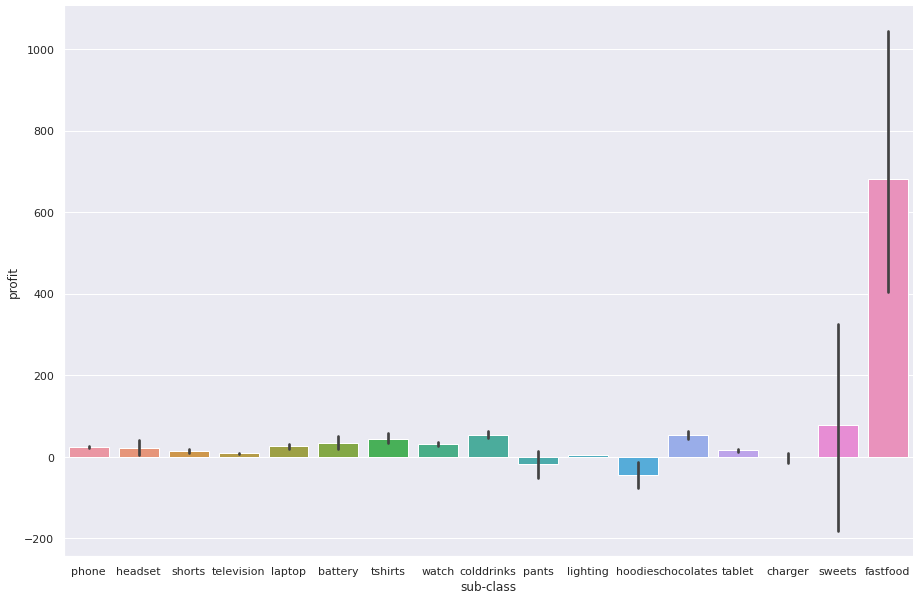

In [48]:
sns.catplot(ax = ax, x="sub-class", y="profit", kind="bar", data=df, height=8.27, aspect=12.7/8.27)

/home/rohit/Desktop/Coneio/nlp/lib/python3.6/site-packages/seaborn/categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


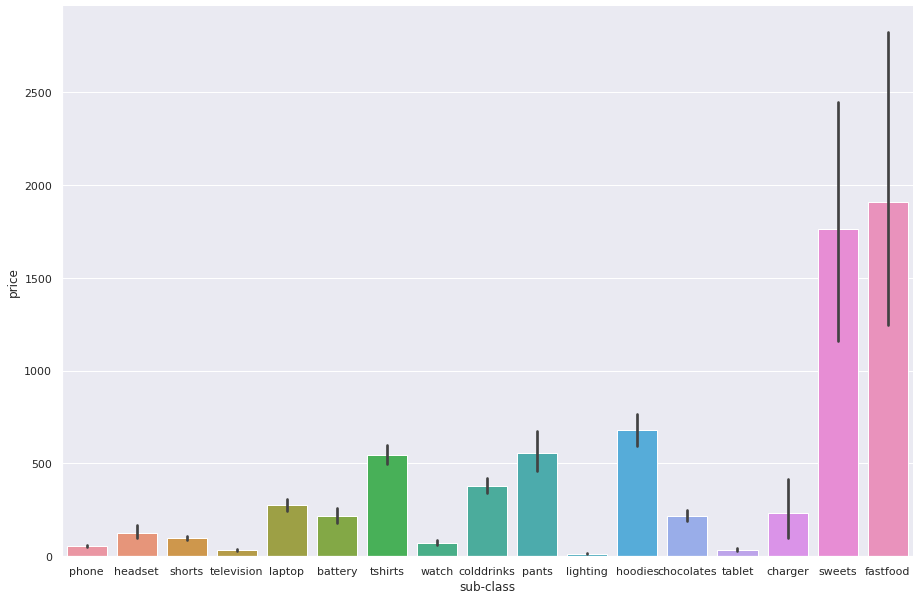

In [49]:
sns.catplot(ax = ax, x="sub-class", y="price", kind="bar", data=df, height=8.27, aspect=12.7/8.27)

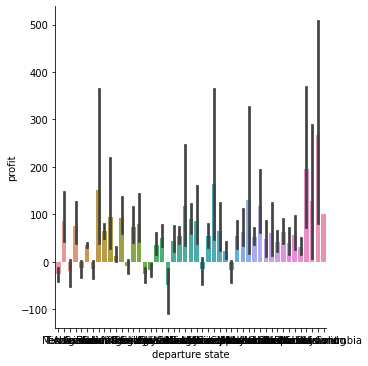

In [21]:
sns.catplot(x="departure state", y="profit", kind="bar", data=df)

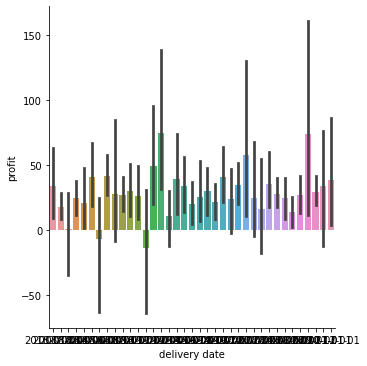

In [31]:
sns.catplot(x="delivery date", y="profit", kind="bar", data=df)

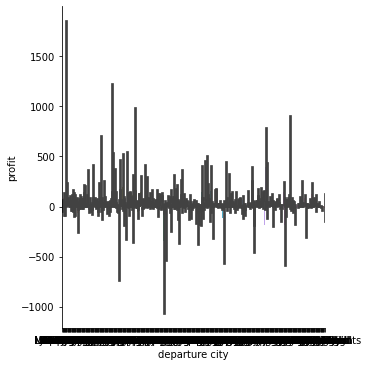

In [24]:
sns.catplot(x="departure city", y="profit", kind="bar", data=df)

In [ ]:
sns.catplot(x="departure city", y="profit", kind="box", data=df)

In [ ]:

#city, code -> 3-4 class

date -> 



In [5]:
df1 = pd.read_csv("test.csv")
df1

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,delivery date,address code,departure state,placement date
0,6701,San Francisco,0.0,24.200,5,West,kariox,Consumer,television,Standard Class,2408,2021-01-01,94122,California,2021-01-01
1,6702,San Francisco,0.2,359.976,3,West,fynota,Consumer,colddrinks,Standard Class,2409,2021-01-01,94122,California,2021-01-01
2,6703,Waterbury,0.0,3.520,2,East,kariox,Consumer,television,Standard Class,5425,2021-01-01,6708,Connecticut,2021-01-01
3,6704,Chicago,0.2,11.520,5,Central,kariox,Consumer,tablet,First Class,7408,2021-01-01,60653,Illinois,2021-01-01
4,6705,Seattle,0.0,242.940,3,West,kariox,Home Office,laptop,Standard Class,733,2021-01-01,98115,Washington,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,9990,New York City,0.0,31.920,4,East,kariox,Consumer,laptop,Second Class,1171,2021-12-01,10035,New York,2021-12-01
3290,9991,New York City,0.0,19.440,3,East,kariox,Consumer,phone,Second Class,1170,2021-12-01,10035,New York,2021-12-01
3291,9992,New York City,0.0,272.940,3,East,kariox,Consumer,laptop,Second Class,1169,2021-12-01,10035,New York,2021-12-01
3292,9993,San Francisco,0.2,113.568,2,West,qexty,Consumer,tshirts,Standard Class,414,2021-12-01,94110,California,2021-12-01
